In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


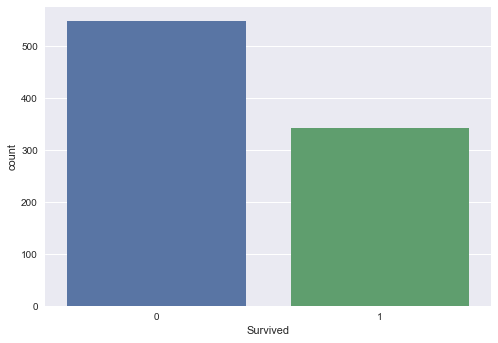

In [5]:
sns.countplot("Survived", data = train)
plt.show()

## Feature: Sex

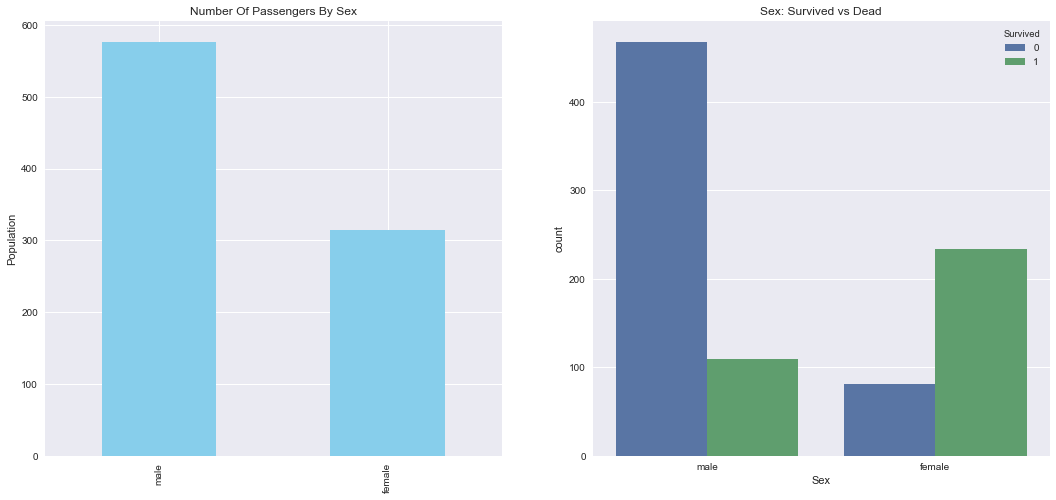

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

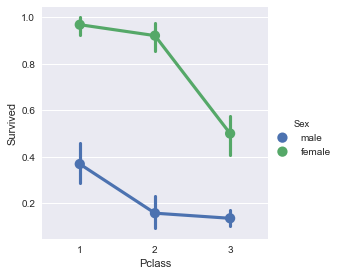

In [7]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train)
plt.show()

In [8]:
pd.crosstab([train["Sex"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

## Feature: Pclass

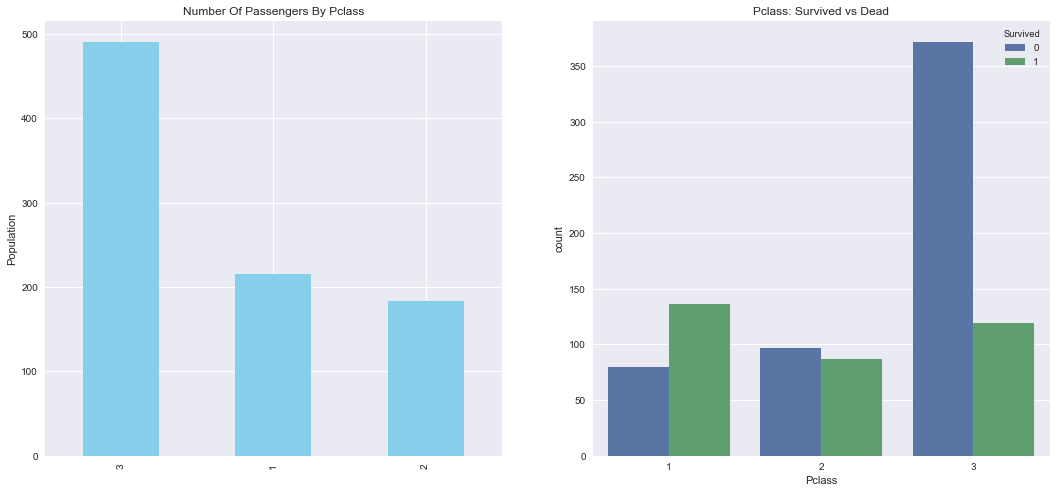

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot("Pclass", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

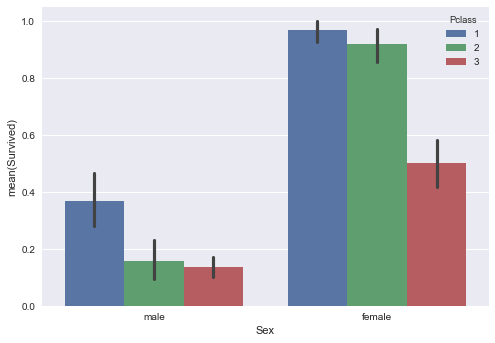

In [10]:
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = train)
plt.show()

## Feature: Title

In [11]:
def get_title(data_frame):
    # Get names from data frame
    name_data = data_frame["Name"]
    
    # Obtain titles
    data_frame["Title"] = [name.split(", ", 1)[1].split(".", 1)[0] for name in name_data]
    
    # Find all titles
    titles = []
    for title in data_frame["Title"]:
        if title not in titles:
            titles.append(title)        
    
    return data_frame, titles

train, titles = get_title(train)
print(titles)
train.info()

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [12]:
pd.crosstab(train["Title"], train["Sex"]).T.style.background_gradient(cmap = "summer_r")

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [13]:
def title2int(data):
    data["Title"].replace(["Major", "Capt", "Sir", "Dr", "Don", "Mlle", "Mme", "Ms", "Dona", "Lady", "the Countess", "Jonkheer", "Col", "Rev"],
                           ["Mr", "Mr", "Mr", "Mr", "Mr", "Miss", "Miss", "Miss", "Mrs", "Mrs", "Mrs", "Other", "Other", "Other"], inplace = True)
    data["Title"].replace(["Mr", "Miss", "Mrs", "Master", "Other"], [0, 1, 2, 3, 4], inplace = True)
    return data

train = title2int(train)

In [14]:
train.groupby("Title")["Age"].mean()

Title
0    32.739609
1    21.860000
2    35.981818
3     4.574167
4    45.888889
Name: Age, dtype: float64

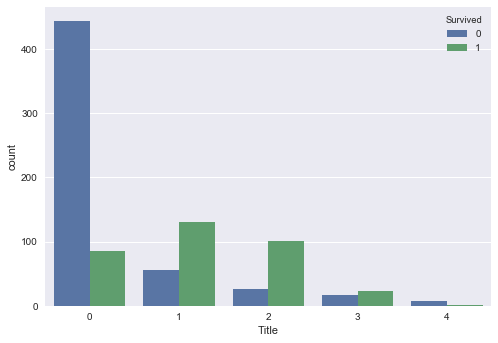

In [15]:
sns.countplot("Title", hue = "Survived", data = train)
plt.show()

In [16]:
pd.crosstab([train["Title"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

## Feature: Fare

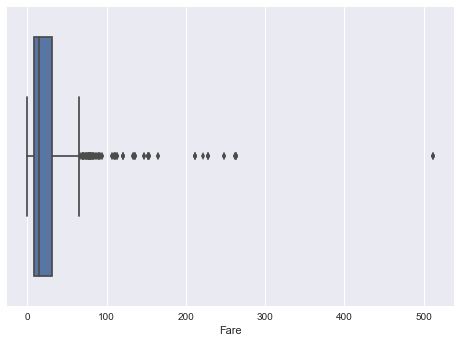

In [17]:
sns.boxplot(train["Fare"])
plt.show()

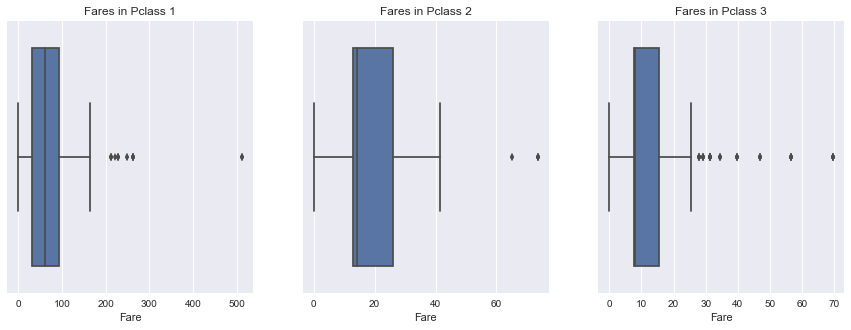

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(train[train["Pclass"] == 1]["Fare"], ax = ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.boxplot(train[train["Pclass"] == 2]["Fare"], ax = ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.boxplot(train[train["Pclass"] == 3]["Fare"], ax = ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

In [19]:
train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [20]:
train.groupby("Pclass")["Fare"].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [21]:
def fareG2int(data):
    data["Fare_group"] = "NaN"
    data.loc[data["Fare"] < 10, "Fare_group"] = 2 # class three
    data.loc[(data["Fare"] >= 10) & (data["Fare"] < 65), "Fare_group"] = 2 # class one and class two
    data.loc[data["Fare"] >= 65, "Fare_group"] = 1 # the patricians
    return data

train = fareG2int(train)

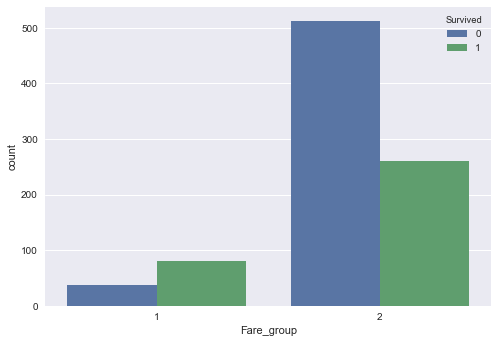

In [22]:
sns.countplot("Fare_group", hue = "Survived", data = train)
plt.show()

## Feature: Embarked

In [23]:
train["Embarked"] = train["Embarked"].fillna("S")

C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)

In [24]:
pd.crosstab([train["Embarked"], train["Survived"]], train["Sex"], margins = True).style.background_gradient(cmap = "summer_r")

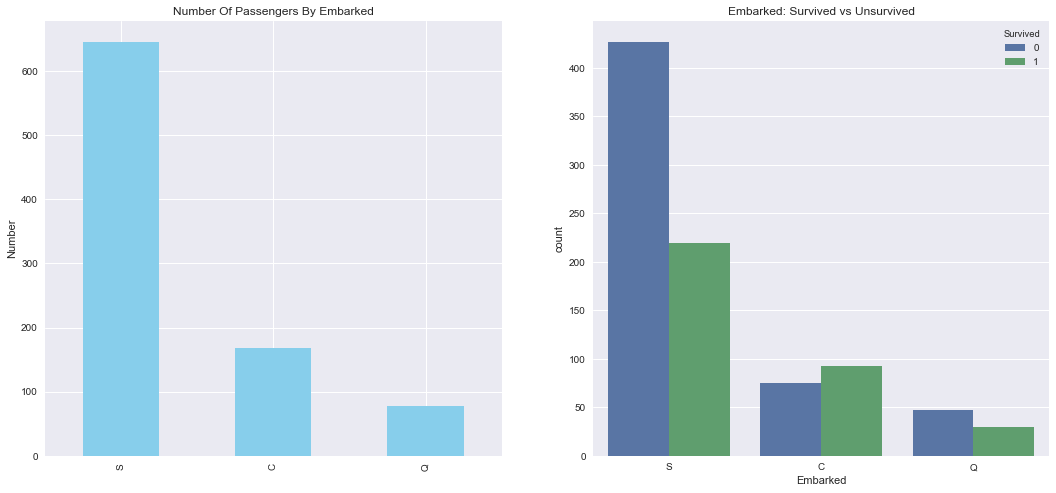

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot("Embarked", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

In [26]:
pd.crosstab([train["Embarked"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

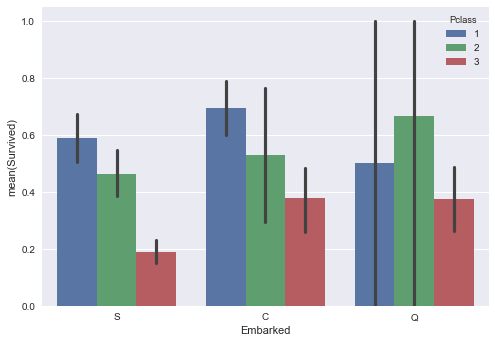

In [27]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Pclass", data = train)
plt.show()

In [28]:
train["Embarked"].replace(["S", "Q", "C"], [0, 1, 2], inplace = True)

## Feature: SibSp

In [29]:
pd.crosstab([train["Pclass"], train["Survived"]], train["SibSp"], margins = True).style.background_gradient(cmap = "summer_r")

## Feature: Parch

In [30]:
pd.crosstab([train["Pclass"], train["Survived"]], train["Parch"], margins = True).style.background_gradient(cmap = "summer_r")

# Feature: Cabin

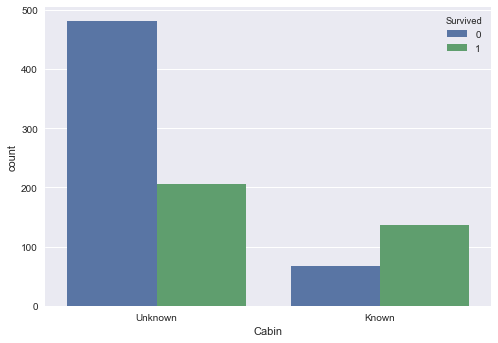

In [31]:
def Cabin_type(data):
    data.loc[data["Cabin"].notnull(), "Cabin"] = "Known"
    data.loc[data["Cabin"].isnull(), "Cabin"] = "Unknown"
    return data

train = Cabin_type(train)
sns.countplot("Cabin", hue = "Survived", data = train)
plt.show()

In [32]:
def cab2int(data):
    data.loc[data["Cabin"] == "Known", 'Cabin'] = 1
    data.loc[data["Cabin"] == "Unknown", 'Cabin'] = 0
    return data

train = cab2int(train)

## Feature: Age

In [33]:
train["Sex"].replace(["male", "female"], [0, 1], inplace = True)

In [34]:
from sklearn.ensemble import RandomForestRegressor

def assign_missing_ages(data_frame, features):
    age_data = data_frame[features]
    known_ages = age_data[age_data.Age.notnull()].as_matrix()
    unknown_ages = age_data[age_data.Age.isnull()].as_matrix()
    
    # Create target and eigenvalues for known ages
    target = known_ages[:, 0]
    eigen_val = known_ages[:, 1:]
    
    # apply random forest regressor
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 2000, n_jobs = -1)
    rfr.fit(eigen_val, target)
    
    # predictions
    Age_predictions = rfr.predict(unknown_ages[:, 1::])
    data_frame.loc[(data_frame.Age.isnull()), "Age"] = Age_predictions
    
    return data_frame, rfr

age_features = ["Age", "Sex", "SibSp", "Parch", "Pclass"]
train, rfr = assign_missing_ages(train, age_features)
train["Age"] = train["Age"].astype(int)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0,0,0,2
5,6,0,3,"Moran, Mr. James",0,29,0,0,330877,8.4583,0,1,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,1,0,0,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,0,0,3,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,0,0,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,0,2,2,2


In [35]:
train.groupby("Title")["Age"].mean()
# ["Mr", "Miss", "Mrs", "Master", "Other"] = [0, 1, 2, 3, 4]

Title
0    32.325142
1    21.741935
2    35.055118
3     5.300000
4    45.888889
Name: Age, dtype: float64

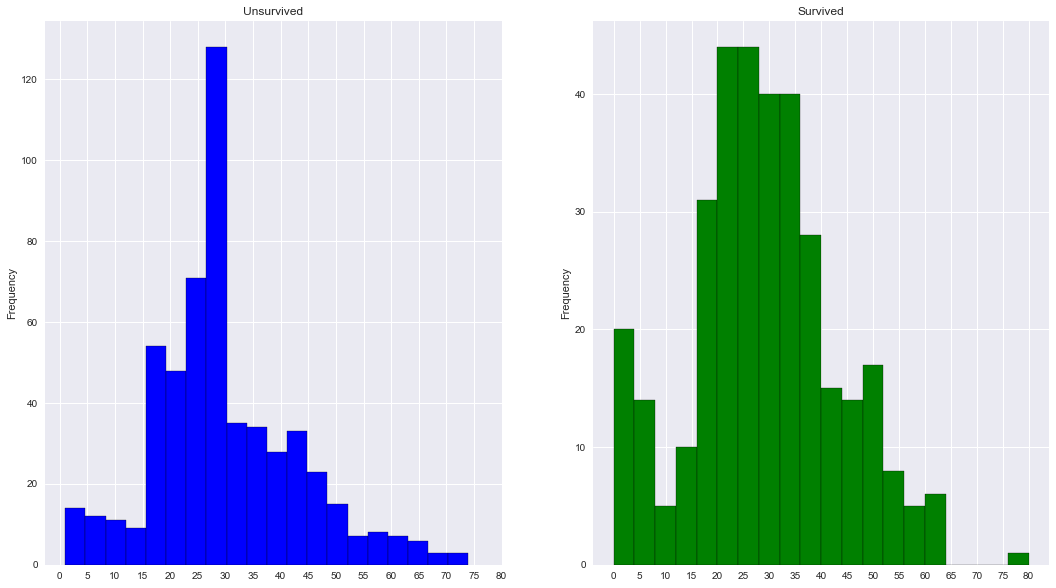

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
train[train["Survived"] == 0]["Age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
ax[0].set_title("Unsurvived")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)
train[train["Survived"] == 1]["Age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("Survived")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()

# Feature Engineering
## New Feature: Age Group

In [37]:
def ageG2int(data):
    data["Age_group"] = "NaN"
    data.loc[data["Age"] <= 16, "Age_group"] = 0 # Child
    data.loc[(data["Age"] > 16) & (data["Age"] <= 32), "Age_group"] = 1 # young teen and teen adult
    data.loc[(data["Age"] > 32) & (data["Age"] <= 48), "Age_group"] = 3 # middle age
    data.loc[(data["Age"] > 48) & (data["Age"] <= 64), "Age_group"] = 4 # young elderly
    data.loc[data["Age"] > 64, "Age_group"] = 5 # elderly
    return data

train = ageG2int(train)

In [38]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_group,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0,0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,2,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0,0,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0,0,0,2,3
5,6,0,3,"Moran, Mr. James",0,29,0,0,330877,8.4583,0,1,0,2,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,1,0,0,2,4
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,0,0,3,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,0,0,2,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,0,2,2,2,0


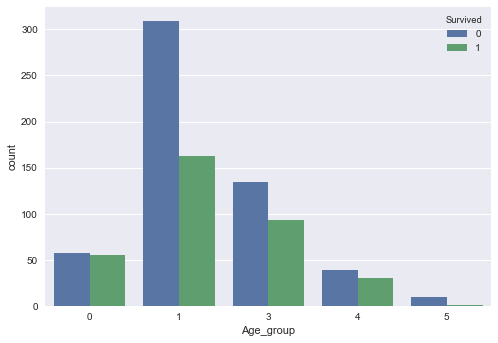

In [39]:
sns.countplot("Age_group", hue = "Survived", data = train)
plt.show()

In [40]:
pd.crosstab([train["Age_group"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

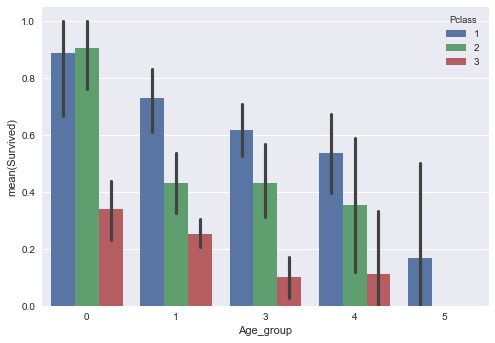

In [41]:
sns.barplot(x = "Age_group", y = "Survived", hue = "Pclass", data = train)
plt.show()

In [42]:
pd.crosstab([train["Age_group"], train["Survived"]], [train["Pclass"], train["Sex"]], margins = True).style.background_gradient(cmap = "summer_r")

# New Feature: Child

In [43]:
def child2int(data):
    data["Child"] = "NaN"
    data.loc[data["Age"] <= 18, "Child"] = 0 # Child
    data.loc[data["Age"] > 18, "Child"] = 1 # Adult
    return data

train = child2int(train)

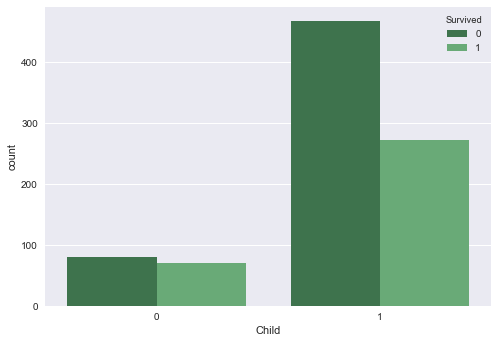

In [44]:
sns.countplot("Child", hue = "Survived", data = train, palette = "Greens_d")
plt.show()

## New Feature: Family Size, Family Group

In [45]:
train["FamSize"] = train["SibSp"] + train["Parch"] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_group,Age_group,Child,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0,0,0,2,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,2,2,1,3,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0,0,1,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,0,2,2,3,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0,0,0,2,3,1,1


In [46]:
def famG2int(data):
    data["Fam_group"] = "NaN"
    data.loc[data["FamSize"] == 1, "Fam_group"] = 0 # Single
    data.loc[data["FamSize"] > 1, "Fam_group"] = 1 # Family
#     data.loc[data["FamSize"] == 2, "Fam_group"] = 1 # Couple
#     data.loc[(data["FamSize"] > 2) & (data["FamSize"] <= 4), "Fam_group"] = 2 # Medium Family
#     data.loc[data["FamSize"] > 4, "Fam_group"] = 3 # Big Family
    return data

train = famG2int(train)

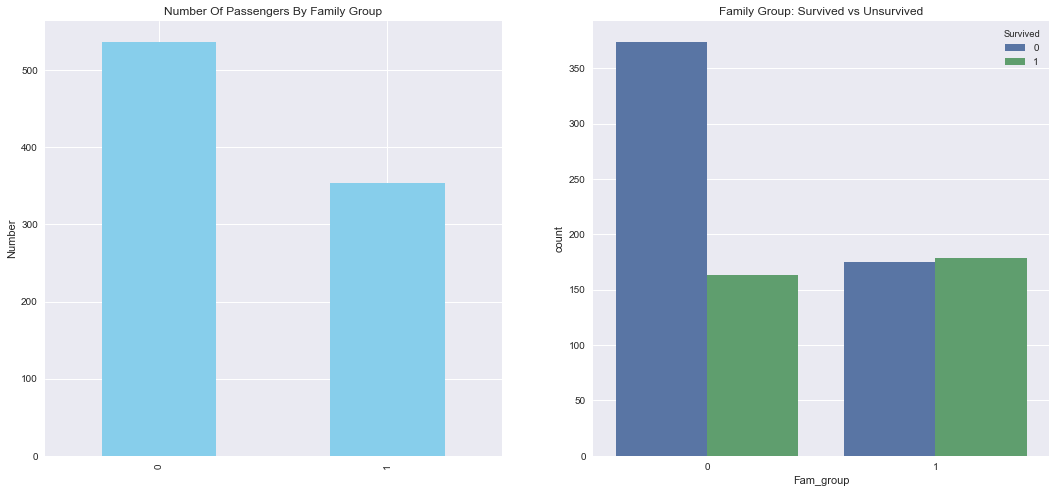

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["Fam_group"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Family Group")
ax[0].set_ylabel("Number")
sns.countplot("Fam_group", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Family Group: Survived vs Unsurvived")
plt.show()

In [48]:
pd.crosstab([train["Fam_group"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

Conclusion:
Money is everything

In [49]:
train_one = train[:]

In [50]:
# Reordering columns
columns_titles = ["PassengerId", "Survived", "Pclass", "Title", "Sex", "Child", "Fam_group", "Fare", "Cabin", "Embarked"]
train_one = train_one[columns_titles]
train_one.head(10)

,PassengerId,Survived,Pclass,Title,Sex,Child,Fam_group,Fare,Cabin,Embarked
0,1,0,3,0,0,1,1,7.2500,0,0
1,2,1,1,2,1,1,1,71.2833,1,2
2,3,1,3,1,1,1,0,7.9250,0,0
3,4,1,1,2,1,1,1,53.1000,1,0
4,5,0,3,0,0,1,0,8.0500,0,0
5,6,0,3,0,0,1,0,8.4583,0,1
6,7,0,1,0,0,1,0,51.8625,1,0
7,8,0,3,3,0,0,1,21.0750,0,0
8,9,1,3,2,1,1,1,11.1333,0,0
9,10,1,2,2,1,0,1,30.0708,0,2


## Convert testing data to corresponding categories

In [51]:
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [52]:
test["Embarked"].replace(["S", "Q", "C"], [0, 1, 2], inplace = True)
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

test, test_titles = get_title(test)
test = title2int(test)
test["Sex"].replace(["male", "female"], [0, 1], inplace = True)
test = Cabin_type(test)
test = cab2int(test)
test = fareG2int(test)

temp_test = test[age_features]
test_unknown_ages = temp_test[test["Age"].isnull()].as_matrix()
test_Age_predictions = rfr.predict(test_unknown_ages[:, 1:])
test.loc[(test["Age"].isnull()), "Age"] = test_Age_predictions
test["Age"] = test["Age"].astype(int)

test = ageG2int(test)
test = child2int(test)
test["FamSize"] = test["SibSp"] + test["Parch"] + 1
test = famG2int(test)

test_one = test[:]
test_columns_titles = ["PassengerId", "Pclass", "Title", "Sex", "Child", "Fam_group", "Fare", "Cabin", "Embarked"]
test_one = test_one[test_columns_titles]
test_one.info()
test_one.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Title          418 non-null int64
Sex            418 non-null int64
Child          418 non-null object
Fam_group      418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 29.5+ KB


,PassengerId,Pclass,Title,Sex,Child,Fam_group,Fare,Cabin,Embarked
0,892,3,0,0,1,0,7.8292,0,1
1,893,3,2,1,1,1,7.0000,0,0
2,894,2,0,0,1,0,9.6875,0,1
3,895,3,0,0,1,0,8.6625,0,0
4,896,3,2,1,1,1,12.2875,0,0
5,897,3,0,0,0,0,9.2250,0,0
6,898,3,1,1,1,0,7.6292,0,1
7,899,2,0,0,1,1,29.0000,0,0
8,900,3,2,1,0,0,7.2292,0,2
9,901,3,0,0,1,1,24.1500,0,0


In [53]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

In [54]:
final_features = ["Pclass", "Title", "Sex", "Child", "Fam_group", "Fare", "Cabin", "Embarked"]
final_data = train_one[["Survived"] + final_features]
training, testing = train_test_split(final_data, test_size = 0.3, random_state = 0, stratify = final_data["Survived"])
X_train = training[training.columns[1:]]
Y_train = training[training.columns[:1]]
X_test = testing[testing.columns[1:]]
Y_test = testing[testing.columns[:1]]

In [55]:
# from sklearn.model_selection import GridSearchCV

# parameter_grid_rf = {"n_estimators": [100, 200, 300, 400, 500], 
#                      "max_depth": [7, 8, 9, 10], 
#                      "max_leaf_nodes": [7, 8, 9, 10],
#                      "min_samples_leaf": [2, 3, 4, 5]}

# parameter_grid_gb = {"learning_rate": [0.1, 0.01, 0.005], 
#                   "n_estimators": [100, 200, 300, 400, 500], 
#                   "max_depth": [7, 8, 9, 10], 
#                   "subsample": [1.0, 0.5], 
#                   "max_features": [1.0, 0.5],
#                   "random_state": [0, 1]}

# forest_model = RandomForestClassifier()
# gradboost_model = GradientBoostingClassifier()

# grid_search = GridSearchCV(forest_model, parameter_grid_rf, cv = 10, verbose = 3)
# X = training.values[:, 1:]
# Y = training.values[:, 0].astype("int")
# grid_search.fit(X, Y)

# print(grid_search.best_score_)
# print(grid_search.best_params_)

### Random Forest:
the best score of grid search is: 0.812199036918 
and the best features are {'max_depth': 8, 'max_leaf_nodes': 9, 'n_estimators': 300}

### Graident Boosting:
the best score of grid search is: 0.826645264848
and the best features are 
{'learning_rate': 0.01, 'max_depth': 7, 'max_features': 1.0, 'n_estimators': 200, 'subsample': 1.0}

In [56]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 7, min_samples_leaf = 10, random_state = 0)
forest_model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = 9, n_estimators = 300, random_state = 0)
gradboost_model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

In [57]:
# from sklearn.learning_curve import learning_curve

# def plot_learning_curve(model, X_train, Y_train, ylim = None, plot = True):
#     train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv = None, 
#                                                             n_jobs = 1, train_sizes = np.linspace(.05, 1, 20), verbose = 0)

#     train_scores_mean = np.mean(train_scores, axis = 1)
#     train_scores_std = np.std(train_scores, axis = 1)
#     test_scores_mean = np.mean(test_scores, axis = 1)
#     test_scores_std = np.std(test_scores, axis = 1)

#     if plot:
#         plt.figure()
#         plt.title("Learning Curve")
#         if ylim is not None:
#             plt.ylim(*ylim)
#         plt.xlabel("Training Samples")
#         plt.ylabel("Scores")
#         plt.gca().invert_yaxis()
#         plt.grid()

#         plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
#                          alpha = 0.1, color = "b")
#         plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
#                          alpha = 0.1, color = "r")
#         plt.plot(train_sizes, train_scores_mean, "o-", color = "b", label = "Training Score")
#         plt.plot(train_sizes, test_scores_mean, "o-", color = "r", label = "CV Score")

#         plt.legend(loc = "best")
#         plt.show()
        
#     midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
#     diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
#     return midpoint, diff

# plot_learning_curve(forest_model, X, Y, ylim = None, plot = True)

## Models

In [58]:
tree_acc, my_tree = my_models(tree_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Decision Tree is", tree_acc)

forest_acc, my_forest = my_models(forest_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Random Forest is", forest_acc)

gradboost_acc, my_gradboost = my_models(gradboost_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Gradient Boosting is", gradboost_acc)

[ 0.17282957  0.63346797  0.027044    0.          0.          0.16665846
  0.          0.        ]
0.828250401284
The accuracy of Decision Tree is 0.828358208955


C:\Python\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 0.13131036  0.28242942  0.31809998  0.01663327  0.02454316  0.1464216
  0.06272762  0.01783459]
0.841091492777
The accuracy of Random Forest is 0.839552238806


C:\Python\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.09625649  0.3958207   0.01048569  0.02133034  0.01740859  0.39603961
  0.02670432  0.03595427]
0.921348314607
The accuracy of Gradient Boosting is 0.820895522388


In [59]:
final_test = test_one[final_features]

tree_prediction = my_tree.predict(final_test)
forest_prediction = my_forest.predict(final_test)
gradboost_prediction = my_gradboost.predict(final_test)

test_cp1 = test_one[:]
test_cp2 = test_one[:]
test_cp3 = test_one[:]

headers = ["PassengerId", "Survived"]

test_cp1["Survived"] = tree_prediction
tree_prediction = pd.DataFrame(test_cp1, columns = headers)
tree_prediction.to_csv("tree_prediction.csv", index = False)

test_cp2["Survived"] = forest_prediction
forest_prediction = pd.DataFrame(test_cp2, columns = headers)
forest_prediction.to_csv("forest_prediction.csv", index = False)

test_cp3["Survived"] = gradboost_prediction
gradboost_prediction = pd.DataFrame(test_cp3, columns = headers)
gradboost_prediction.to_csv("gradboost_prediction.csv", index = False)

C:\Python\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Python\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
